# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('insurance.csv')
print("number of rows is " , len(df))
print(df.isna().sum())
print(df.dtypes)
print(df.head())

number of rows is  1338
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


The dataframe is small, there are no missing values and every data type is consistent. 

## First approach

#### Smoker/No smoker

number of no-smokers = 1064 number of smokers = 274


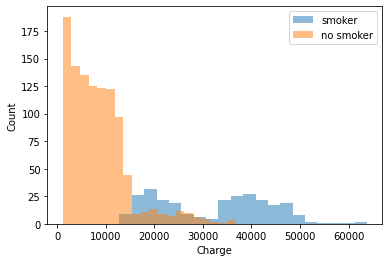

In [3]:
x_yes = df.loc[df['smoker']== 'yes']
x_no = df.loc[df['smoker']== 'no']
print('number of no-smokers =', len(x_no), 'number of smokers =', len(x_yes))
plt.hist(x_yes['charges'], bins = 20, alpha=0.5 ,label = 'smoker')
plt.hist(x_no['charges'], bins = 20, alpha=0.5 ,label = 'no smoker')
plt.xlabel('Charge')
plt.ylabel('Count')
plt.legend()
plt.show()

The number of no-smokers in the samples is larger than the smokers one. The most of the no-smokers seems to pay less than the cheaper charge for a smoker. It would make sense since smokers are more likable to have respiratory problems and lung diseases.

In [4]:
td, pd = ttest_ind(np.array(x_yes['charges']),
                 np.array(x_no['charges']), equal_var=False)
print(pd)

5.88946444671698e-103


As expected, p-value < 0.05, so the null hypothesis is rejected (null hypothesis: both average are no significatly different) with a significance level of 0.05.

####  Male/ Female

number of female = 662 number of male = 676


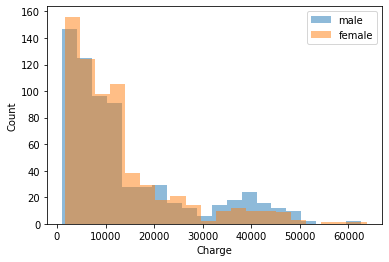

In [5]:
x_f = df.loc[df['sex']== 'female']
x_m = df.loc[df['sex']== 'male']
print('number of female =', len(x_f), 'number of male =', len(x_m))
plt.hist(x_m['charges'], bins = 20, alpha=0.5 ,label = 'male')
plt.hist(x_f['charges'], bins = 20, alpha=0.5 ,label = 'female')
plt.xlabel('Charge')
plt.ylabel('Count')
plt.legend()
plt.show()

The number of female and male are pretty similar. The shape of the histograms also look pretty similar for both.

In [6]:
td, pd = ttest_ind(np.array(x_f['charges']),
                 np.array(x_m['charges']), equal_var=False)
print(pd)
f_mean = np.array(x_f['charges']).mean()
m_mean = np.array(x_m['charges']).mean()
print('For female, the average charge is', int(f_mean.round()), 'while for the male users the average charge is', int(m_mean.round()))

0.035841014956016645
For female, the average charge is 12570 while for the male users the average charge is 13957


Performing a t-test, the p-value is lower than 0.05 so the hypothesis of both average not being significatly different is wrong with a significance level of 0.05.
Calculating the average chage for both male and female, male pay more. The causes maybe the larger probability of car accident or  being more likely than female to develop cancer and other diseases.

#### BMI

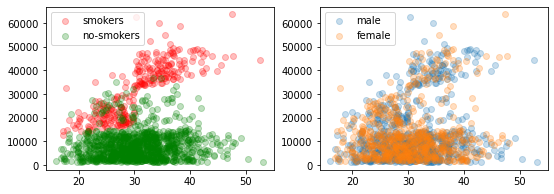

In [7]:
df_y = df.loc[df['smoker']== 'yes']
df_n = df.loc[df['smoker']== 'no']

df_f = df.loc[df['sex']== 'female']
df_m = df.loc[df['sex']== 'male']

f = plt.figure(figsize=(9,3))
ax = f.add_subplot(121)
ax.scatter(df_y['bmi'], df_y['charges'],alpha=0.25, color = 'red', label = 'smokers')
ax.scatter(df_n['bmi'], df_n['charges'],alpha=0.25, color = 'green', label = 'no-smokers')
#ax.subtitle('Dependence with bmi')
#ax.xlabel('bmi')
#ax.ylabel('Charge')
ax.legend()

bx = f.add_subplot(122)
bx.scatter(df_m['bmi'], df_m['charges'], alpha=0.25, label = 'male')
bx.scatter(df_f['bmi'], df_f['charges'], alpha=0.25, label = 'female')
#bx.title('Dependence with sex')
#bx.xlabel('bmi')
#bx.ylabel('Charge')
bx.legend()
plt.show()

## There is a great difference for smokers with bmi over 30. Variable risk is created.
def f(row):
    if (row['smoker'] == 'yes') and (row['bmi'] >= 30):
        val = 1
    else:
        val = 0
    return val
df['risk'] = df.apply(f, axis=1)

The age depency plot brings very interesting information. The increasement with the age seems to be linear, but it does not seem to be the most influent variable. Also, it seems like there are three different linear regression with similar slope but different intercept. It would mean that there are at least two differnt (probably binary) feartures that have a higher impact in the insurance charge (like gender or being smoker).

On the other hand, the dependence with BMI does not seem to be linear but there could be two different clusters.

In this last plot it is possible to see that this different clusters does not seems to be bmi related, but smokers related.

#### Number of Children

             mean          count     
smoker         no      yes    no  yes
children                             
0          7612.0  31341.0   459  115
1          8303.0  31823.0   263   61
2          9493.0  33844.0   185   55
3          9615.0  32725.0   118   39
4         12121.0  26532.0    22    3
5          8184.0  19023.0    17    1


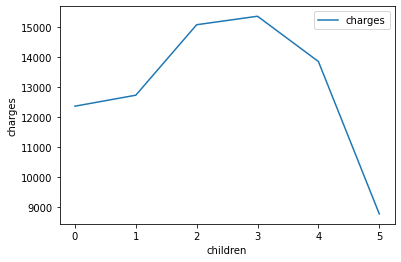

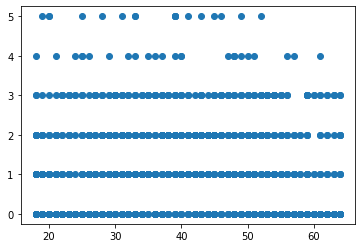

In [8]:
print(df.pivot_table(index = 'children', columns = 'smoker', values = 'charges', aggfunc = ['mean', 'count']).round())
df.pivot_table(index = 'children', values = 'charges', aggfunc = 'mean').plot(xlabel = 'children', ylabel = 'charges')
plt.show()
plt.scatter(df['age'], df['children'])
plt.show()

The number of children is ploted to see its dependency with the age. Interesting information is found. Firstly, there are people arround their 20' with more than 3 children. Also, there are many people older than 50 with no children. This patron does not seem natural for any population, specially at the United States. 

The data may not be real as it has been suggested for an exercise.

The number of children does not seem to be a key factor in the price of the medical insurance considering all the data.

In [9]:
print(df.pivot_table(index = 'region', values = 'charges', aggfunc = ['mean', 'count']).round())
a = np.asarray(df.loc[df['region'] == 'northeast'].charges)
b = np.asarray(df.loc[df['region'] == 'southwest'].charges)
c = np.asarray(df.loc[df['region'] == 'northwest'].charges)
d = np.asarray(df.loc[df['region'] == 'southeast'].charges)
f_values, p_value = stats.f_oneway(a,b,c,d)
print(p_value)

              mean   count
           charges charges
region                    
northeast  13406.0     324
northwest  12418.0     325
southeast  14735.0     364
southwest  12347.0     325
0.0308933560705201


By performing an Anova test, it is checked that the average charges paid at the different areas is significatly different with a significance level of 0.05
null hypothesis: averages are no significatly different. Rejected (p < 0.05).

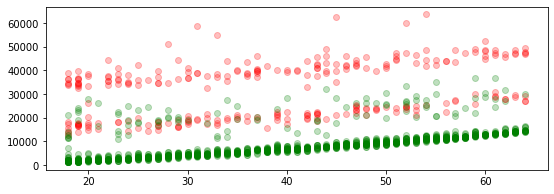

In [10]:
df_y = df.loc[df['smoker']== 'yes']
df_n = df.loc[df['smoker']== 'no']
f = plt.figure(figsize=(9,3))
ax = f.add_subplot(111)
ax.scatter(df_y['age'], df_y['charges'],alpha=0.25, color = 'red', label = 'smokers')
ax.scatter(df_n['age'], df_n['charges'],alpha=0.25, color = 'green', label = 'no-smokers')
plt.legend
plt.show()

Ploting the charges agains the ages it can be appreciated that the charges grow with the age. However, there is more than one linear regression with similar slope but with different intercept probably due to other features. It is shown by ploting in different colors smokers and no smokers charges.

### Region

['southwest' 'southeast' 'northwest' 'northeast']
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'risk', 'northwest', 'southwest', 'northeast', 'north', 'west']
['age', 'sex', 'bmi', 'children', 'smoker', 'risk', 'north', 'west', 'charges']


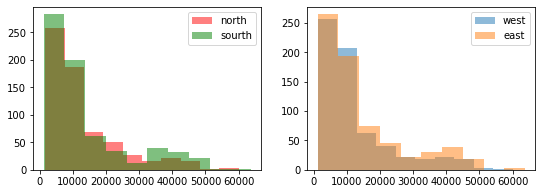

In [11]:
df['sex'] = np.where(df['sex'] == 'female',0,1)
df['smoker'] = np.where(df['smoker'] == 'yes',1,0)

df.head()
print(df['region'].unique())
"df_y = df.loc[df['smoker']== 'yes']"
df['northwest'] = np.where(df['region'] == 'northwest',1,0)
df['southwest'] = np.where(df['region'] == 'southwest',1,0)
df['northwest'] = np.where(df['region'] == 'northwest',1,0)
df['northeast'] = np.where(df['region'] == 'northeast',1,0)
df['north'] = df['northwest'] + df['northeast']
df['west'] = df['northwest'] + df['southwest']
columns = list(df.columns)
print(columns)
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'risk', 'north', 'west', 'charges']
df = df[columns]
columns = list(df.columns)
print(columns)

df_n = df.loc[df['north']== 1]
df_s = df.loc[df['north']== 0]

df_w = df.loc[df['west']== 1]
df_e = df.loc[df['west']== 0]

f = plt.figure(figsize=(9,3))
ax = f.add_subplot(121)
ax.hist(df_n['charges'],alpha=0.5, color = 'red', label = 'north')
ax.hist(df_s['charges'],alpha=0.5, color = 'green', label = 'sourth')
ax.legend()

bx = f.add_subplot(122)
bx.hist(df_w['charges'], alpha=0.5, label = 'west')
bx.hist(df_e['charges'], alpha=0.5, label = 'east')

bx.legend()
plt.show()
## Different regions have different profiles

In [12]:
columns = list(df.columns)
#print(columns)
df.head()
columns = list(df.columns)
df[df['charges']>60000]
print(columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'risk', 'north', 'west', 'charges']


In [13]:
def print_score(train_score, test_score):
    if (train_score < test_score):
        print('Train_score =', train_score, 'Test_score =', test_score ,": Probably not overfitting")
    else:
        print('Train_score =', train_score, 'Test_score =', test_score ,": Probably overfitting")


## Model Building

### Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])
#print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## Linear model
model = linear_model.LinearRegression() #X_train, y_train, fit_intercept=True, normalize=False
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
ytest_predicted_regre = model.predict(X_test)
y_predicted_regre = model.predict(X_train)
#print_score(train_score, test_score)
print('Variance score: %.2f' % r2_score(y_test, ytest_predicted_regre))

Variance score: 0.87


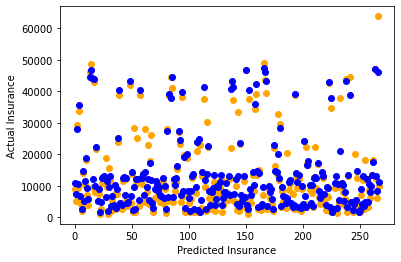

Train_score = 0.8608910991427481 Test_score = 0.8721842805311464 : Probably not overfitting


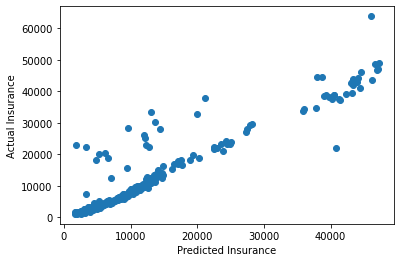

In [15]:
plt.scatter(range(len(y_test)),y_test, color = 'orange', label = 'data')
plt.scatter(range(len(y_test)),ytest_predicted_regre, color = 'blue', label = 'modelo')
plt.xlabel("Predicted Insurance")
plt.ylabel("Actual Insurance")
plt.legend
plt.show()
print_score(train_score, test_score)
plt.scatter(ytest_predicted_regre,y_test)
plt.xlabel("Predicted Insurance")
plt.ylabel("Actual Insurance")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 75).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)

train_score = rfr.score(X_train, y_train)
test_score = rfr.score(X_test, y_test)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.5743e+06, MSE test data: 2.1387e+07
RMSE train data: 1890.6, RMSE test data: 1890.6
R2 train data: 0.97524, R2 test data: 0.86224


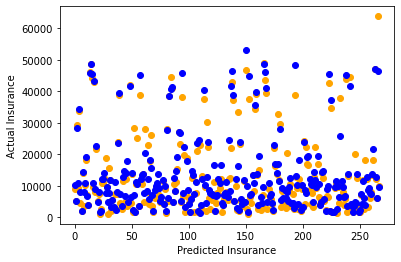

Train_score = 0.9749129729318544 Test_score = 0.859485869210995 : Probably overfitting


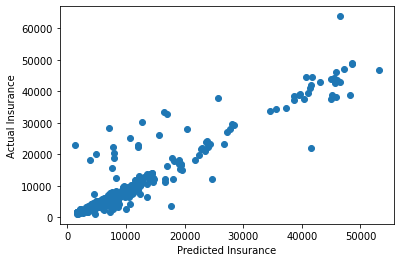

In [22]:
plt.scatter(range(len(y_test)),y_test, color = 'orange', label = 'data')
plt.scatter(range(len(y_test)),rfr_test_pred, color = 'blue', label = 'modelo')
plt.xlabel("Predicted Insurance")
plt.ylabel("Actual Insurance")
plt.legend
plt.show()
print_score(train_score, test_score)
plt.scatter(rfr_test_pred,y_test)
plt.xlabel("Predicted Insurance")
plt.ylabel("Actual Insurance")
plt.show()